<a href="https://colab.research.google.com/github/palberth/CienciaDatos-MASDI/blob/main/Activida_3_5_Ciencia_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://tinyurl.com/ynykrk7j)

## Introducción

Este informe detalla el análisis exploratorio, preprocesamiento, y modelado de un conjunto de datos sobre indicadores de salud global y esperanza de vida.

Para ilustrar este proceso, utilizaremos un dataset que fue seleccionado para abordar un problema de regresión, cuyo objetivo es predecir la esperanza de vida en función de diversas variables predictoras relacionadas con salud, economía y demografía.

A continuación, se muestra cómo cargar este dataset en un DataFrame de Pandas.

In [ ]:
# verificar si estamos en google colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [ ]:
IN_COLAB

True

In [ ]:
import os
# Obtener el directorio raíz del proyecto
dir_root = os.path.dirname(os.getcwd())
dir_root

'/'

In [ ]:
# Importamos la biblioteca pandas
import pandas as pd
data = pd.read_csv("/content/Life Expectancy Data.csv", on_bad_lines='skip', encoding='latin-1')

# Mostramos las 15 filas del dataset
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Exploranción del DataFrame

Una vez que el dataset se ha cargado en un DataFrame de Pandas, podemos explorar el dataset utilizando varias funciones de Pandas.


### 1. Obtener información sobre el DataFrame

De esta manera, podemos ver el número de filas y columnas que contiene el DataFrame, junto con el tipo de datos que contiene cada columna.

Lo cual nos permite responder preguntas como:

* ¿Cuántas filas y columnas hay en el DataFrame?
* ¿Qué tipo de datos contiene cada columna?
* ¿Hay valores faltantes en el DataFrame?
* ¿Qué columnas o filas contienen valores faltantes?
* ¿Qué columnas contienen valores numéricos?
* ¿Qué columnas contienen valores no numéricos?
* ¿Qué columnas pueden ser características?
* ¿Qué columna contiene la variable objetivo?


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### 2. Obtener estadísticas descriptivas del DataFrame

Es posible utilizar la función `describe()` para obtener estadísticas descriptivas del DataFrame.

Esto nos permite responder preguntas como:

* ¿Cuál es el valor mínimo en una columna?
* ¿Cuál es el valor máximo en una columna?
* ¿Cuál es el valor medio en una columna?
* ¿Cuál es la desviación estándar en una columna?
* ¿Cuál es el valor mínimo en una fila?
* ¿Cuál es el valor máximo en una fila?
  

In [ ]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### 3. Verificar si hay valores faltantes

Es posible utilizar la función `isnull()` para verificar si hay valores faltantes en el DataFrame.

In [ ]:
data.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


### 4. Explorar la correlación entre las columnas

En un problema de clustering, es importante explorar la correlación entre las columnas. Esto nos permite responder preguntas como:

* ¿Qué columnas están altamente correlacionadas?
* ¿Qué columnas están débilmente correlacionadas?
* ¿Qué columnas no están correlacionadas?
* ¿Qué columnas son las más importantes para el problema de clustering?
* ¿Qué columnas son las menos importantes para el problema de clustering?
* ¿Qué columnas pueden ser eliminadas del DataFrame?
* ¿Qué columnas pueden ser características?
  

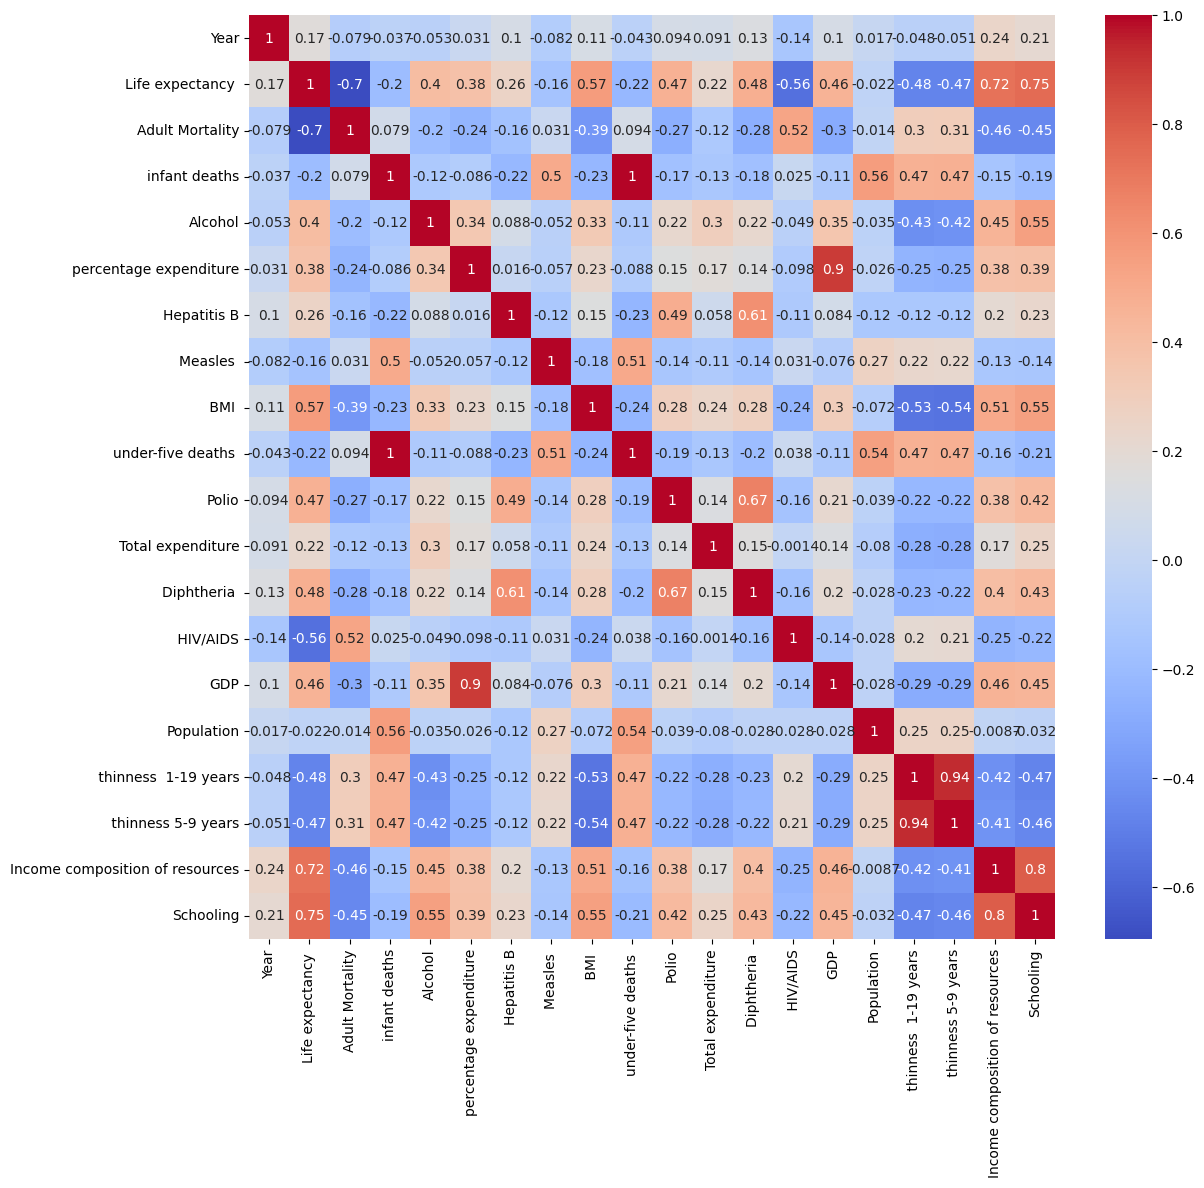

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Suponiendo que 'data' es tu DataFrame
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(13,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 5. Explorar la distribución de las columnas

Es posible utilizar la función `hist()` para explorar la distribución de las columnas numéricas.

Esto nos permite responder preguntas como:

* ¿Qué columnas tienen una distribución normal?

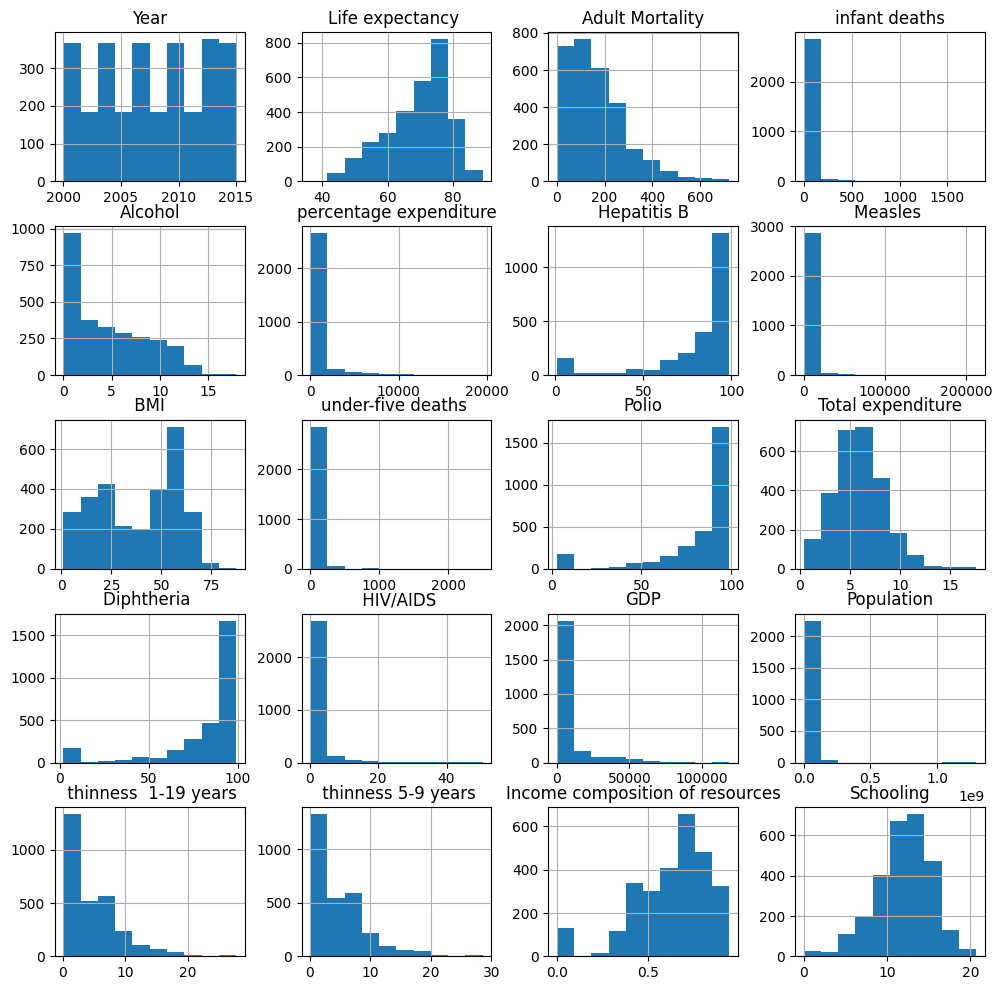

In [ ]:
data.hist(figsize=(12, 12))
plt.show()

### 6. Explorar la distribución de las variables categóricas

Es posible utilizar la función `value_counts()` para explorar la distribución de las variables categóricas.

Esto nos permite responder preguntas como:

* ¿Cuántas categorías hay en una columna?
* ¿Cuántas filas pertenecen a cada categoría en una columna?


In [ ]:
data["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

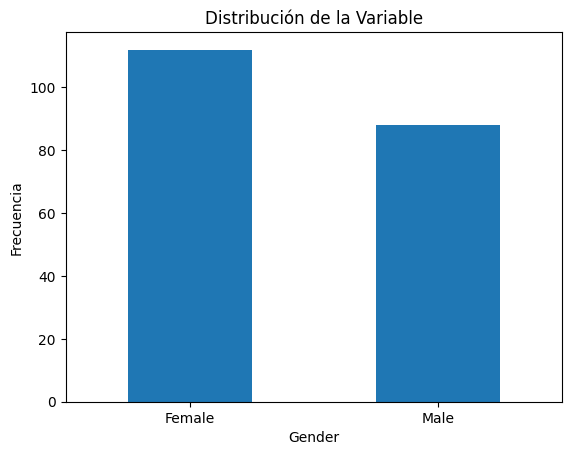

In [ ]:
# Visualizar la distribución de variables categóricas
count_classes = pd.value_counts(data['Gender'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribución de la Variable")
plt.ylabel("Frecuencia")
plt.xlabel("Genero")